In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [208]:
import warnings
warnings.filterwarnings('ignore')

In [209]:
df = pd.read_excel('income.xlsx')

In [210]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [211]:
df.drop(columns=['capitalgain', 'capitalloss'], inplace=True)

In [212]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,35,United-States,"less than or equal to 50,000"


In [213]:
cols = ['JobType', 'EdType', 'maritalstatus', 'occupation', 'relationship', 'race', 
        'gender', 'nativecountry', 'SalStat']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [214]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,hoursperweek,nativecountry,SalStat
0,45,4,11,0,1,1,4,0,28,38,1
1,24,1,11,4,2,3,4,1,40,38,1
2,44,4,15,2,10,0,4,1,40,38,0
3,27,4,6,4,3,2,4,1,40,25,1
4,20,4,15,4,12,1,4,1,35,38,1


In [215]:
df.SalStat.value_counts()

1    24283
0     7695
Name: SalStat, dtype: int64

1 : Less than or equal to 50k, 0 means less than 50k

In [216]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,hoursperweek,nativecountry,SalStat
0,45,4,11,0,1,1,4,0,28,38,1
1,24,1,11,4,2,3,4,1,40,38,1
2,44,4,15,2,10,0,4,1,40,38,0
3,27,4,6,4,3,2,4,1,40,25,1
4,20,4,15,4,12,1,4,1,35,38,1


In [217]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,hoursperweek,nativecountry,SalStat
age,1.000000,0.002941,-0.009375,-0.265736,-0.020929,-0.264718,0.026615,0.089035,0.068299,-0.000323,-0.233601
JobType,0.002941,1.000000,0.024515,-0.065426,0.255280,-0.090504,0.051732,0.094961,0.139431,-0.003658,-0.051166
EdType,-0.009375,0.024515,1.000000,-0.038663,-0.021248,-0.011239,0.014345,-0.027212,0.056381,0.077016,-0.080056
maritalstatus,-0.265736,-0.065426,-0.038663,1.000000,-0.010070,0.185034,-0.068888,-0.129334,-0.193249,-0.021846,0.198467
occupation,-0.020929,0.255280,-0.021248,-0.010070,1.000000,-0.076039,0.008921,0.080062,0.080514,-0.004583,-0.076930
relationship,-0.264718,-0.090504,-0.011239,0.185034,-0.076039,1.000000,-0.117787,-0.581323,-0.248907,-0.010668,0.250866
race,0.026615,0.051732,0.014345,-0.068888,0.008921,-0.117787,1.000000,0.090093,0.045787,0.121527,-0.072713
gender,0.089035,0.094961,-0.027212,-0.129334,0.080062,-0.581323,0.090093,1.000000,0.229645,0.001556,-0.216070
hoursperweek,0.068299,0.139431,0.056381,-0.193249,0.080514,-0.248907,0.045787,0.229645,1.000000,0.006238,-0.230448
nativecountry,-0.000323,-0.003658,0.077016,-0.021846,-0.004583,-0.010668,0.121527,0.001556,0.006238,1.000000,-0.023179


In [218]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['SalStat']), df['SalStat'], test_size = 0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25582, 10), (25582,), (6396, 10), (6396,))

In [219]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []


In [220]:
algo = "Logistic Regression"
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Logistic Regression
[[ 223 1266]
 [ 234 4673]] 


Accuracy: 76.54784240150094
Recall: 95.23130222131648
Precision: 78.68328001347028
F score: 86.17001659598007


In [221]:
algo = "K Nearest Neighbour"
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

K Nearest Neighbour
[[ 770  719]
 [ 615 4292]] 


Accuracy: 79.14321450906817
Recall: 87.46688404320359
Precision: 85.65156655358211
F score: 86.54970760233918


In [222]:
algo = "Decision Tree"
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Decision Tree
[[ 846  643]
 [ 759 4148]] 


Accuracy: 78.08005003126954
Recall: 84.53230079478297
Precision: 86.57900229597162
F score: 85.54341101257991


In [223]:
algo = "Naive Bayes"
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Naive Bayes
[[1021  468]
 [1077 3830]] 


Accuracy: 75.84427767354597
Recall: 78.05176278785409
Precision: 89.11121451838065
F score: 83.21564367191743


In [224]:
algo = "Random Forest"
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Random Forest
[[ 827  662]
 [ 461 4446]] 


Accuracy: 82.44215134459037
Recall: 90.60525779498676
Precision: 87.0399373531715
F score: 88.78681977034448


In [225]:
for i in range(5):
    print(algos[i], ':     ', accuracy[i],',  ', recall[i],',  ', precision[i],',  ', f1Score[i])

Logistic Regression :      76.54784240150094 ,   95.23130222131648 ,   78.68328001347028 ,   86.17001659598007
K Nearest Neighbour :      79.14321450906817 ,   87.46688404320359 ,   85.65156655358211 ,   86.54970760233918
Decision Tree :      78.08005003126954 ,   84.53230079478297 ,   86.57900229597162 ,   85.54341101257991
Naive Bayes :      75.84427767354597 ,   78.05176278785409 ,   89.11121451838065 ,   83.21564367191743
Random Forest :      82.44215134459037 ,   90.60525779498676 ,   87.0399373531715 ,   88.78681977034448


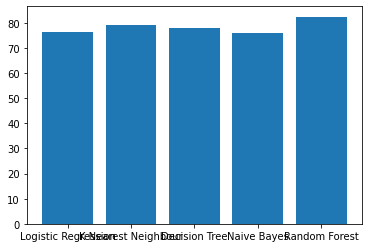

In [228]:
plt.bar(algos, accuracy)
plt.show()